In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

This is a classification task because we are attempting to predict a categorical variable. We are trying to predict either a 0 or 1, meaning we must treat this problem as a classification task. We want the output to be categorical.

In [3]:
data = pd.read_csv(filepath_or_buffer='data.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
print("below shows how many unique values are in each column:")
print(data.nunique())

below shows how many unique values are in each column:
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


There are 303 observations

There are no missing values

Categorical:
    sex
    cp
    fbs
    restecg
    exng
    slp
    caa
    thall
    output
    
It appears that these variables are binary or their values are associated with something other than the number it is assigned.

Continuous:
    age
    trtbps
    chol
    thalachh
    oldpeak

It appears that these variables are measured numerically, and the values have significant meaning.

In [7]:
data['target'] = data['output'].apply(lambda x: 'Low chance of attack (0)' if x==0 else 'High chance of attack (1)')
data['target']

0      High chance of attack (1)
1      High chance of attack (1)
2      High chance of attack (1)
3      High chance of attack (1)
4      High chance of attack (1)
                 ...            
298     Low chance of attack (0)
299     Low chance of attack (0)
300     Low chance of attack (0)
301     Low chance of attack (0)
302     Low chance of attack (0)
Name: target, Length: 303, dtype: object

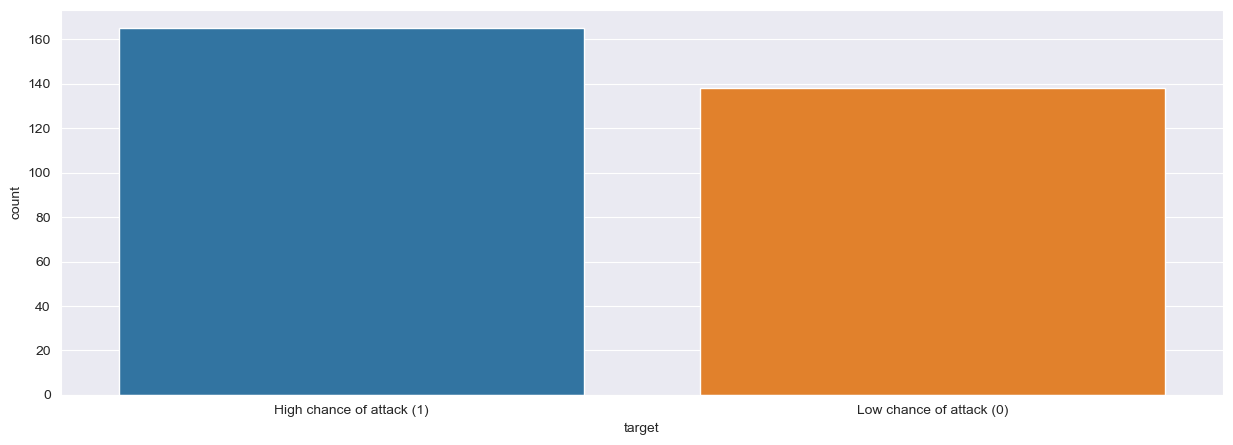

In [8]:
sns.countplot(x = data['target'])
plt.show()

This dataset has more people that have a higher chance of attack (1) than people that have a lower chance of attack (0).

Working with a balanced dataset is important so that we can have an equal amount of observations of each target variable. We do not want our data to represent one outcome more than the other.

We can deal with an imbalanced data set by gathering more observations until the dataset is more balanced. In addition, we can at random drop observations that have the majority of the outcome.

Text(0.5, 1.0, 'Target Countplot')

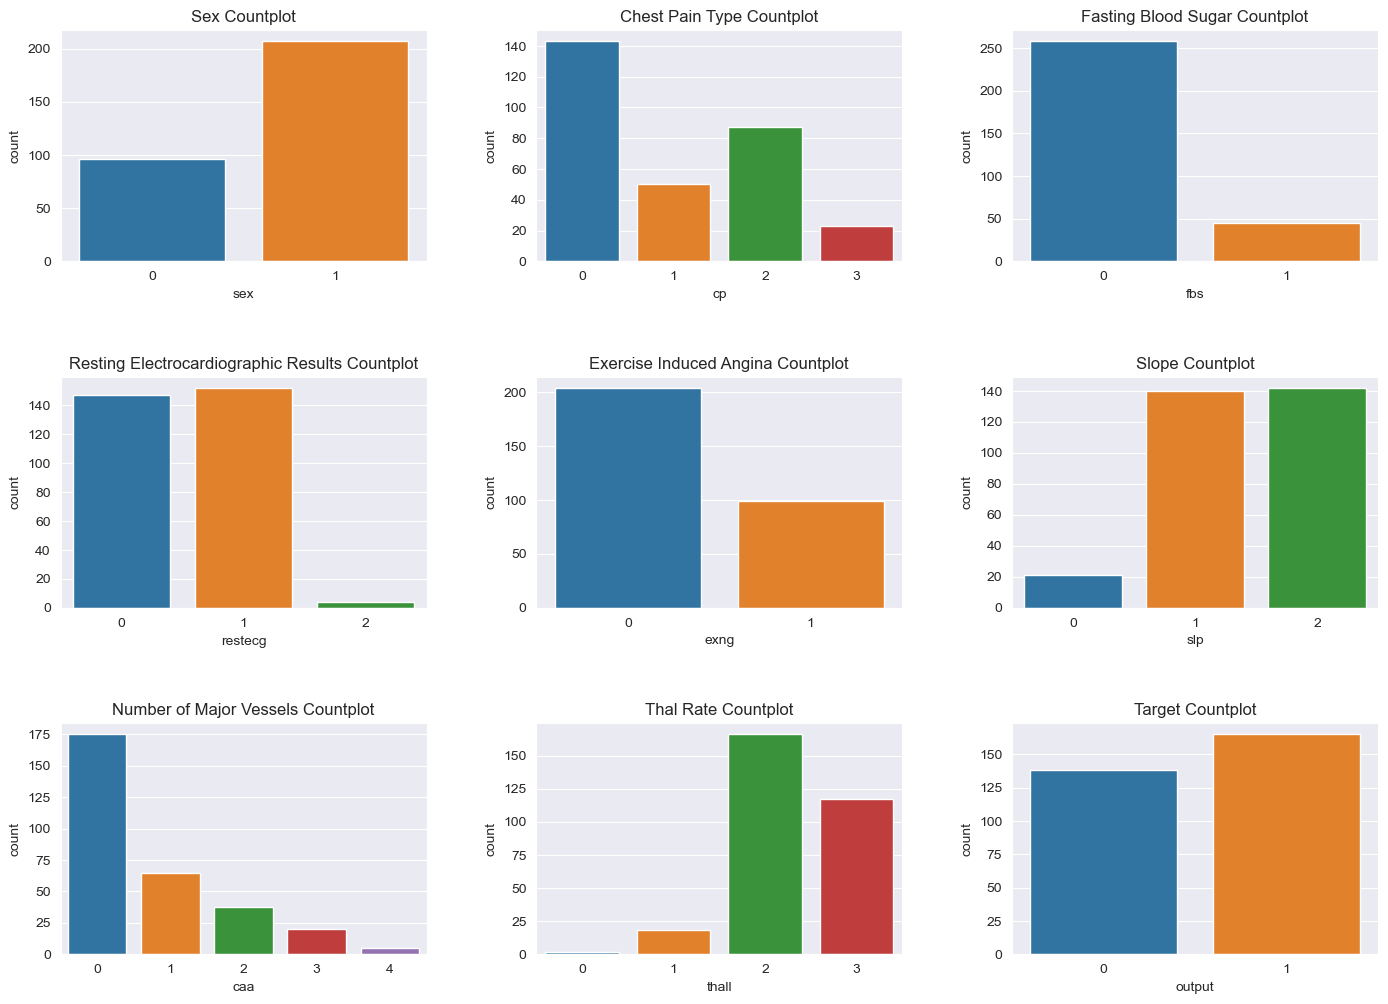

In [9]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

sns.countplot(x = data['sex'], ax = axes[0][0])
axes[0][0].set_title('Sex Countplot')

sns.countplot(x = data['cp'], ax = axes[0][1])
axes[0][1].set_title('Chest Pain Type Countplot')

sns.countplot(x = data['fbs'], ax = axes[0][2])
axes[0][2].set_title('Fasting Blood Sugar Countplot')

sns.countplot(x = data['restecg'], ax = axes[1][0])
axes[1][0].set_title('Resting Electrocardiographic Results Countplot')

sns.countplot(x = data['exng'], ax = axes[1][1])
axes[1][1].set_title('Exercise Induced Angina Countplot')

sns.countplot(x = data['slp'], ax = axes[1][2])
axes[1][2].set_title('Slope Countplot')

sns.countplot(x = data['caa'], ax = axes[2][0])
axes[2][0].set_title('Number of Major Vessels Countplot')

sns.countplot(x = data['thall'], ax = axes[2][1])
axes[2][1].set_title('Thal Rate Countplot')

sns.countplot(x = data['output'], ax = axes[2][2])
axes[2][2].set_title('Target Countplot')

There are more female than male samples. <br>
Most samples have typical angina. <br>
Most samples have a low fasting blood sugar. <br>
The majority of samples are split with having normal or abnormal resting ecg results. <br>
Many samples do not have exercise induced angina. <br>
Slope is mainly either 1 or 2. <br>
Number of major vessels is majority 0. <br>
Thal rate is majority 2, then 3. <br>
The target variable almost balanced, with more samples with a high chance of attack (1).

Text(0.5, 1.0, 'Previous peak Spread by Outcome')

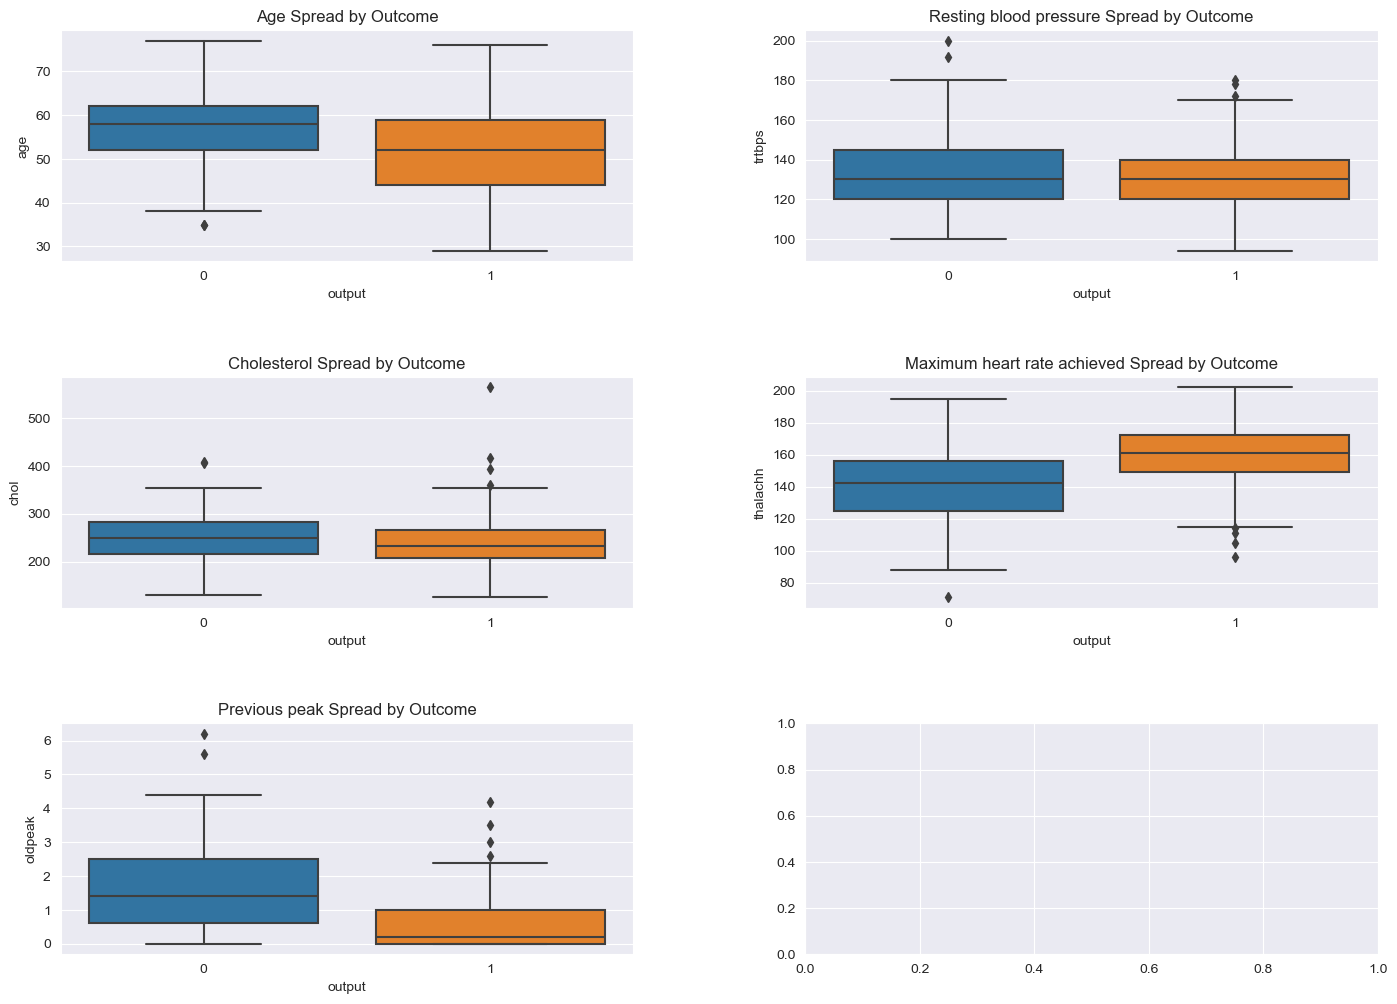

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (17,12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

sns.boxplot(x= data['output'], y = data['age'], ax = axes[0][0])
axes[0][0].set_title('Age Spread by Outcome')

sns.boxplot(x= data['output'], y = data['trtbps'], ax = axes[0][1])
axes[0][1].set_title('Resting blood pressure Spread by Outcome')

sns.boxplot(x= data['output'], y = data['chol'], ax = axes[1][0])
axes[1][0].set_title('Cholesterol Spread by Outcome')

sns.boxplot(x= data['output'], y = data['thalachh'], ax = axes[1][1])
axes[1][1].set_title('Maximum heart rate achieved Spread by Outcome')

sns.boxplot(x= data['output'], y = data['oldpeak'], ax = axes[2][0])
axes[2][0].set_title('Previous peak Spread by Outcome')

The range of low chance of attack samples are a little older than high chance of attack samples. The majority of the high chance of attack samples are younger than the majority of the low chance of attack samples. <br>
When looking at the boxplots of the different outcomes, the resting blood pressures look similar. The low chance of attack has a higher value in the outliers. <br>
Cholesterol in both outcomes are similar. There are more outliers in the high chance of attack, with higher cholesterol values. <br>
Maximum heart rate achieved in high chance of attack outcomes are higher than low chance of attack outcomes. <br>
Previous peak is has a higher and larger range in samples with a low chance of attack outcome.

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


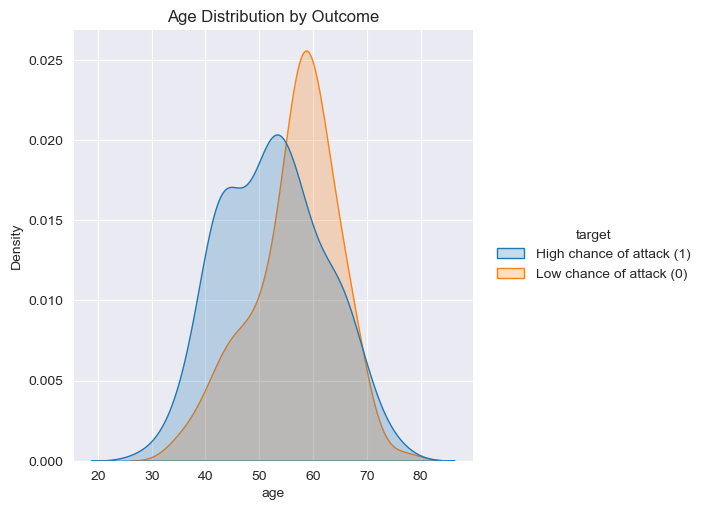

In [11]:
sns.displot(x= data['age'], hue = data['target'], kind = "kde", fill = True)
plt.title('Age Distribution by Outcome')
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


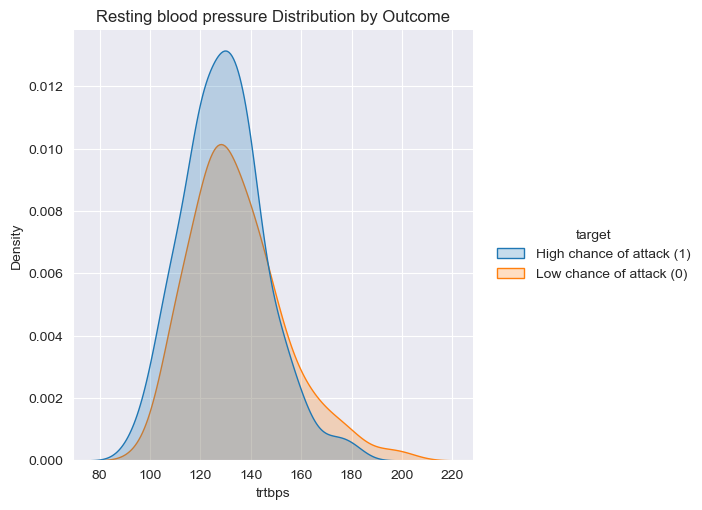

In [12]:
sns.displot(x= data['trtbps'], hue = data['target'], kind = "kde", fill = True)
plt.title('Resting blood pressure Distribution by Outcome')
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


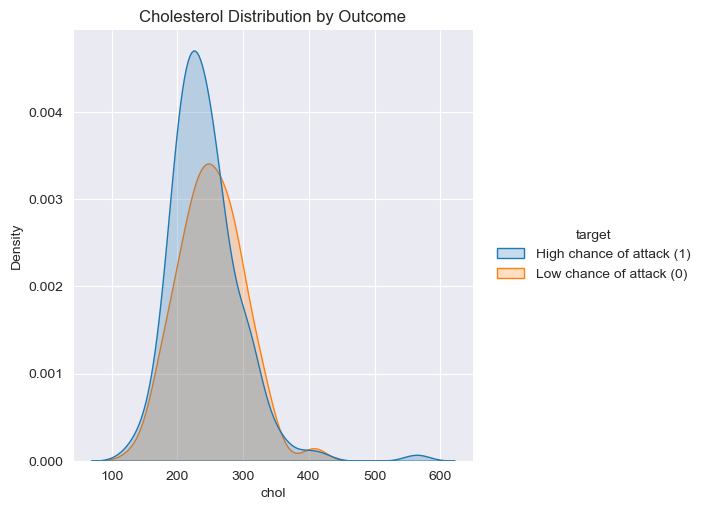

In [13]:
sns.displot(x= data['chol'], hue = data['target'], kind = "kde", fill = True)
plt.title('Cholesterol Distribution by Outcome')
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


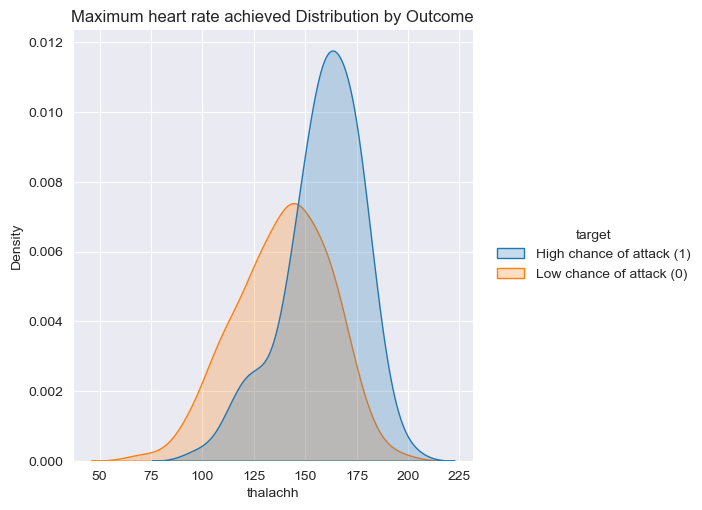

In [14]:
sns.displot(x= data['thalachh'], hue = data['target'], kind = "kde", fill = True)
plt.title('Maximum heart rate achieved Distribution by Outcome')
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


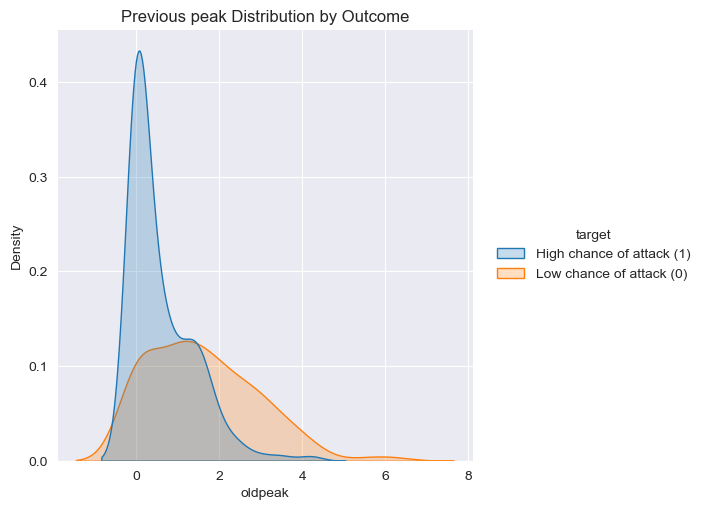

In [15]:
sns.displot(x= data['oldpeak'], hue = data['target'], kind = "kde", fill = True)
plt.title('Previous peak Distribution by Outcome')
plt.show()

High chance of attack outcomes are dense around age 40 to 60. Low chance of attack outcomes are dense around 55-65. The majority of resting blood pressure is at 130 for both outcomes, but for low chance of attack, samples have a high resting blood pressure than high chance of attack. The majority of cholesterol is about the 230 for both outcomes, for high chance there are some samples with very high cholesterol. More samples had a higher maximum heart rate for high chance of attack outcomes. High chance of attack outcomes had a very high density of 0 for their old peak.

In [16]:
data.drop(columns = 'target', inplace = True)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

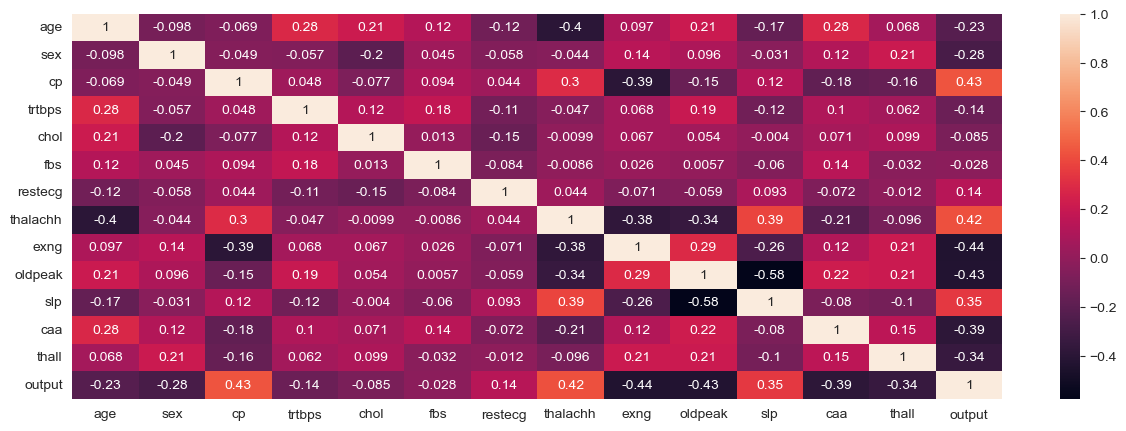

In [17]:
sns.heatmap(data.corr(), annot = True)

Output is most correlated with cp, thalachh, and slp.

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


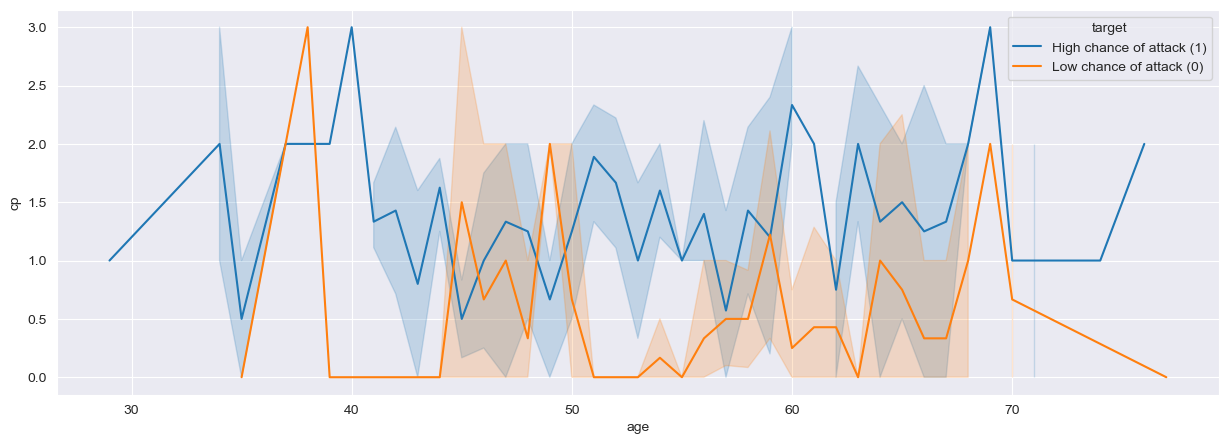

In [18]:
data['target'] = data['output'].apply(lambda x: 'Low chance of attack (0)' if x==0 else 'High chance of attack (1)')
sns.lineplot(x = data['age'], y = data['cp'], hue = data['target'])
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


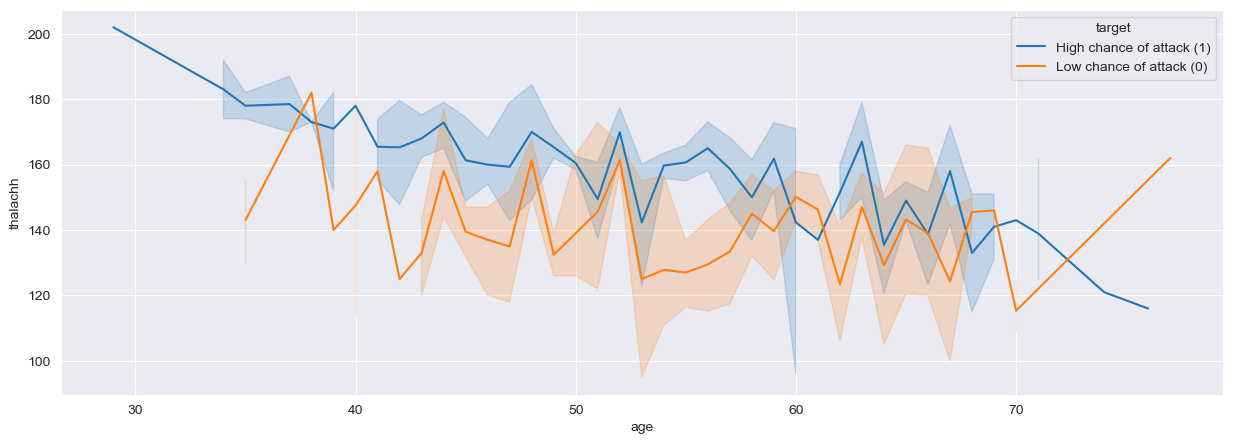

In [19]:
sns.lineplot(x = data['age'], y = data['thalachh'], hue = data['target'])
plt.show()

/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haleytrinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


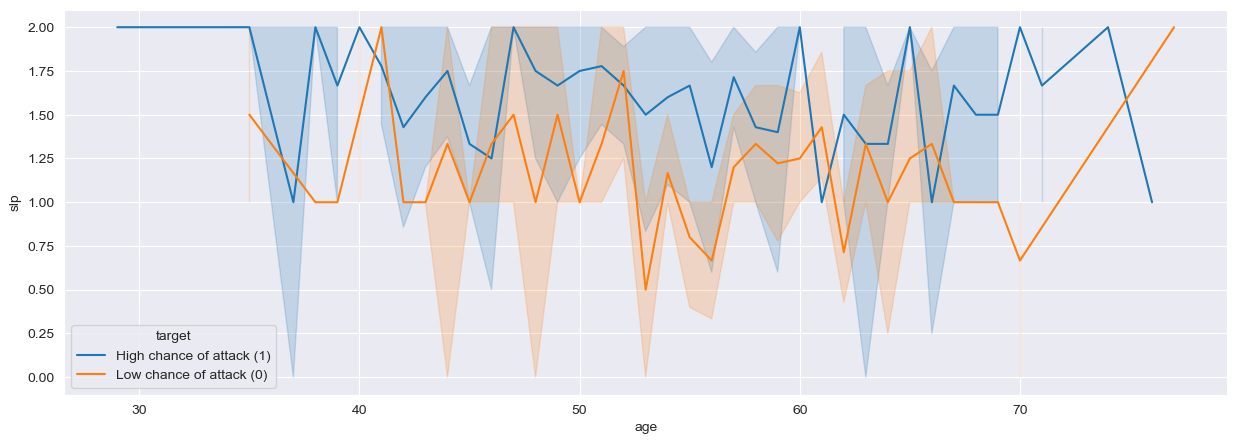

In [20]:
sns.lineplot(x = data['age'], y = data['slp'], hue = data['target'])
plt.show()

Chest pain type is mostly near the value zero for the Low chance of attack outcomes. Zero is valued as typical angina. The chest pain type for the high chance of attack outcomes does not hit zero, meaning that most of these outcomes have atypical, non-anginal, or asymptomatic angina. <br>

Samples for the high chance of attack have a higher maximum heart rate achieved than samples for the low chance of attack. There seems to be a negative correlation between age and maximum heart rate. <br>

Slope is usually around 1.5 to 2 for high chance of attack samples, while slope is mainly around 1 to 1.5 for low chance of attack samples.<br>


STEP 8 <br>


We can use a logistic regression model or a Naive Bayes model to solve the problem statement. <br>


Label encoding creates a new column to transform an ordinal categorical variable and assign each value an integer. One-hot encoding creates n columns for n unique values of a nominal categorical variable, and assigns each row with a column with a 1, while the rest of the n columns are assigned a value of 0.

Label encoding is used for handling ordinal categorical variables.
One-hot encoding is for handling nominal categorical variables. <br>

Multicollinearity is when features in a dataset are strongly dependent on each other. If multicollinearity is present, then we will not be able to calculate feature importance, impacting how the model in interpreted. We can check to see if there is multicollinearity in our data by plotting a pair plot. <br>

Scaling data is important so that we can use the data in machine learning models such as KNN. Models will be less prone to being largely affected if the distance between data points is consistent, therefore scaling is important. <br>

Logistic regression and Naive Bayes are parametric learning algorithms. Parametric means that there are a fixed number of parameters and the model makes strong assumptions about the data. Non-parametric means there are a flexible number of parameters that usually grows as the algorithm learns more data. Non-parametric is computationally slower than a parametric algorithm. <br>

For missing values, we can ignore the tuple, fill them in manually, or perform imputation to replace the missing values. <br>

In [21]:
data.drop(columns = 'target', inplace = True)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
continuous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
X = data.drop(columns = 'output')
y = data['output']
X_scaled = scaler.fit_transform(X[continuous])
X[continuous] = X_scaled
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
predictions = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        42
           1       0.77      0.96      0.85        49

    accuracy                           0.82        91
   macro avg       0.85      0.81      0.82        91
weighted avg       0.85      0.82      0.82        91



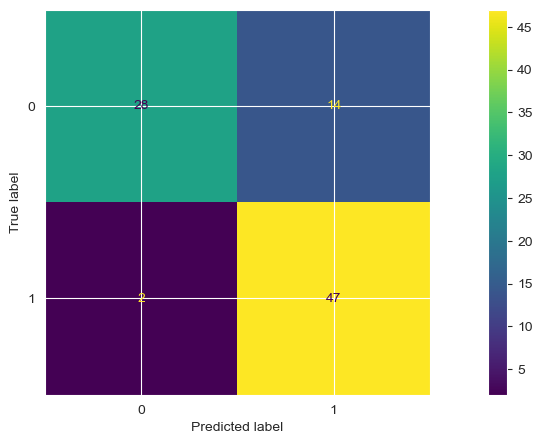

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logmodel, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

print('\nStandard Deviation: ')
print(np.std(scores))

Cross-validation scores:[0.86363636 0.81818182 0.80952381 0.9047619  0.80952381 0.52380952
 0.95238095 0.80952381 0.80952381 0.95238095]

Average cross-validation score: 0.8253

Standard Deviation: 
0.11490245010544978


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
predictions =gnb.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.7802


In [31]:
predictions_train = gnb.predict(X_train)
print('Training set score: {:.4f}'.format(gnb.score(X_train, predictions_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7802


With the Naive Bayes model, it looks like there is some overfitting.

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.75      0.90      0.81        49

    accuracy                           0.78        91
   macro avg       0.79      0.77      0.77        91
weighted avg       0.79      0.78      0.78        91



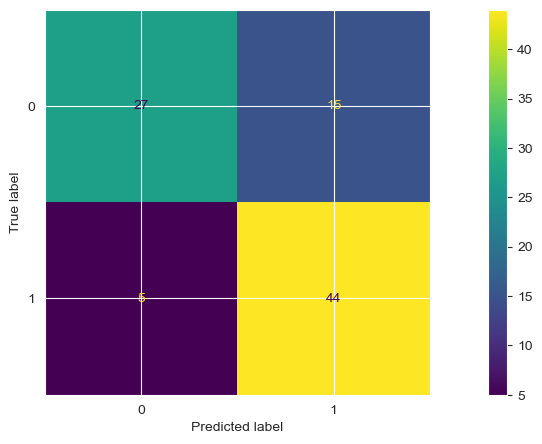

In [32]:
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [33]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

print('\nStandard Deviation: ')
print(np.std(scores))

Cross-validation scores:[0.86363636 0.86363636 0.85714286 0.9047619  0.80952381 0.61904762
 0.76190476 0.61904762 0.85714286 0.95238095]

Average cross-validation score: 0.8108

Standard Deviation: 
0.10709015276368862


I discovered that chest pain type, maximum heart rate acheived, and slope were the features that mostly correlated with how prone a person is to a heart attack. Samples of all different ages have a high chance of attack and their maximum heart rate was higher than those with low chance of attack. Many of the high chance of attack observations had different kinds of chest pain, while low chance of attack observations have mainly normal pain.

I scaled my data with a robust scaler because there are large ranges of continuous variables. I selected these models because they are classifiers.The F1 score for the logistic regression model was 0.82, which is fairly accurate. The F1 score for the Naive Bayes model was 0.78, which is lower but fairly accurate as well. The average cross validation was higher for the Naive Bayes model. Both standard deviations for cross validation scores were similar.